<a href="https://colab.research.google.com/github/guptabhishek785/web_Scrapping/blob/main/PMO_India_state_visits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [167]:
#!pip install BeautifulSoup

import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np
import re

In [168]:
# date_pattern = r'\b(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)\s\d{2},\s\d{4}\s-\s(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)\s\d{2},\s\d{4}\s'
from tqdm import tqdm

states = []
dates = []
official = []

for i in tqdm(range(1,66)):
  webpage = requests.get(f'https://www.pmindia.gov.in/en/pm-visits/page/{i}/?visittype=domestic_visit').text
  soup = BeautifulSoup(webpage, 'lxml')

  for j in soup.find_all('h3', class_="modal-title"):
    try:
      dates.append(j.text.split("(")[-1][:-2])
    except:
      dates.append(f"pg-no{i}")

    try:
      temp = j.text.split("PM’s visit to ")[1].split("(")
      states.append(' '.join(temp[:-1]).strip())
    except:
      states.append(f"pg-no{i}")
    try:
      is_official = 'yes' if ('[Non-official]' not in (j.text)) and ('[Non-official Tour]' not in (j.text)) else 'no'
      official.append(is_official)
    except:
      official.append(f"pg-no{i}")

100%|██████████| 65/65 [00:25<00:00,  2.58it/s]


In [169]:
final = pd.DataFrame({"states": states, "dates": dates, "official": official})

In [170]:
final

,states,dates,official
0,Andhra Pradesh & Kerala,"Jan 16, 2024 - Jan 17, 2024",yes
1,Maharashtra,"Jan 12, 2024 - Jan 12, 2024",yes
2,Gujarat,"Jan 08, 2024 - Jan 10, 2024",yes
3,Rajasthan,"Jan 05, 2024 - Jan 07, 2024",yes
4,"Tamil Nadu, Lakshadweep, & Kerala","Jan 02, 2024 - Jan 03, 2024",yes
...,...,...,...
636,Maharastra Mumbai),"Jul 21, 2014 - Jul 21, 2014",yes
637,"Jammu and Kashmir Jammu, Katra, Srinagar and ...","Jul 04, 2014 - Jul 04, 2014",yes
638,Andhra Pradesh Sriharikota),"Jun 29, 2014 - Jun 30, 2014",yes
639,Haryana Surajkund)– [Non-official Tour],"Jun 28, 2014 - Jun 28, 2014",no


In [172]:
states_list = [
    "Andhra Pradesh",
    "Arunachal Pradesh",
    "Assam",
    "Bihar",
    "Chhattisgarh",
    "Goa",
    "Gujarat",
    "Haryana",
    "Himachal Pradesh",
    "Jharkhand",
    "Karnataka",
    "Kerala",
    "Maharashtra",
    "Madhya Pradesh",
    "Manipur",
    "Meghalaya",
    "Mizoram",
    "Nagaland",
    "Odisha",
    "Punjab",
    "Rajasthan",
    "Sikkim",
    "Tamil Nadu",
    "Tripura",
    "Telangana",
    "Uttar Pradesh",
    "Uttarakhand",
    "West Bengal",
    "Andaman",
    "Chandigarh",
    "Dadra",
    "Delhi",
    "Jammu & Kashmir",
    "J&K"
    "Ladakh",
    "Lakshadweep",
    "Puducherry"
]

count = {}
for p in states_list:
  count[p] = 0

In [173]:
for n in tqdm(states):
  for o in states_list:
    if o in n:
      count[o]+=1

100%|██████████| 641/641 [00:00<00:00, 71412.79it/s]


In [174]:
sum = 0
for y in count:
  sum = sum + count[y]

In [175]:
sum

821

In [176]:
count

{'Andhra Pradesh': 14,
 'Arunachal Pradesh': 6,
 'Assam': 26,
 'Bihar': 37,
 'Chhattisgarh': 21,
 'Goa': 11,
 'Gujarat': 84,
 'Haryana': 24,
 'Himachal Pradesh': 20,
 'Jharkhand': 30,
 'Karnataka': 41,
 'Kerala': 22,
 'Maharashtra': 54,
 'Madhya Pradesh': 49,
 'Manipur': 7,
 'Meghalaya': 6,
 'Mizoram': 2,
 'Nagaland': 5,
 'Odisha': 19,
 'Punjab': 18,
 'Rajasthan': 41,
 'Sikkim': 2,
 'Tamil Nadu': 31,
 'Tripura': 11,
 'Telangana': 18,
 'Uttar Pradesh': 142,
 'Uttarakhand': 26,
 'West Bengal': 37,
 'Andaman': 1,
 'Chandigarh': 3,
 'Dadra': 3,
 'Delhi': 0,
 'Jammu & Kashmir': 5,
 'J&KLadakh': 0,
 'Lakshadweep': 2,
 'Puducherry': 3}

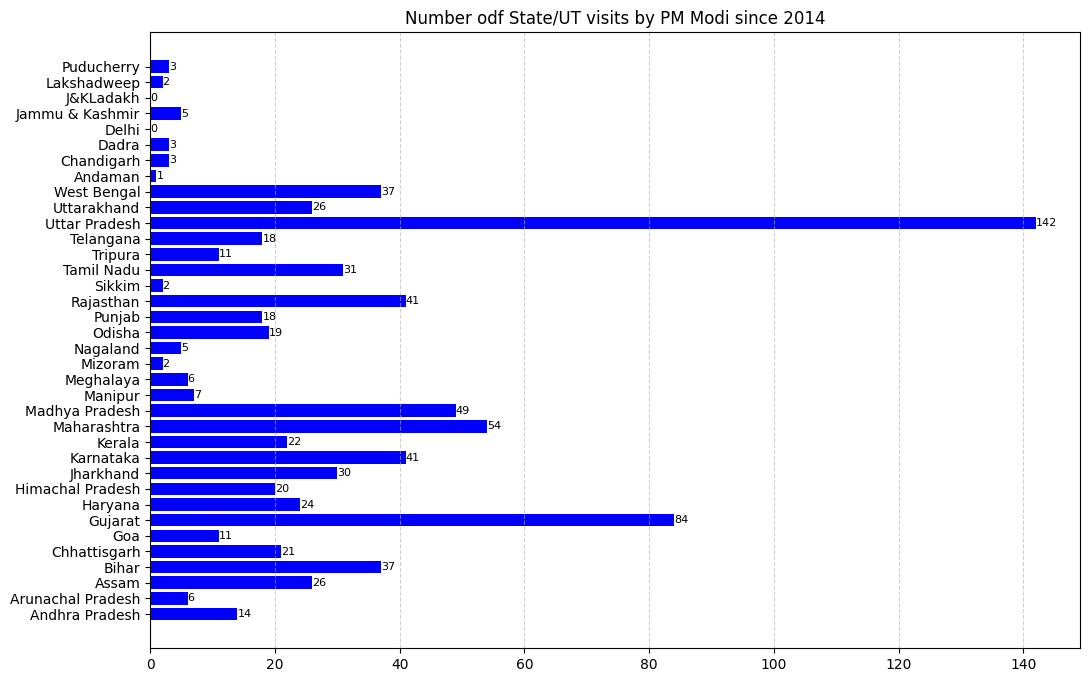

In [179]:
import matplotlib.pyplot as plt

data = count

# Convert data to lists for plotting
states_xbar = list(data.keys())
values_ybar = list(data.values())

# Plotting the bar chart
plt.figure(figsize=(12, 8))
plt.barh(states_xbar, values_ybar, color='blue')
plt.title('Number odf State/UT visits by PM Modi since 2014')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Display the values on the bars
for index, value in enumerate(values):
    plt.text(value, index, str(value), va='center', fontsize=8)

plt.show()
